<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamín Farías
- Nombre de alumno 2: Jordán Pérez


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Link de repositorio de GitHub:** `https://github.com/IsaacJordan-bit/Laboratorio-de-programaci-n-cientifica/tree/main/Laboratorios`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Noveno semestre/Laboratorio de programación/lab10/diabetes_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

from xgboost import XGBClassifier, plot_importance

In [ ]:
ct = ColumnTransformer([
    ('minmax', MinMaxScaler(), list(set(df.columns)-set(['Diabetes'])))
], verbose_feature_names_out=False)

pipe = Pipeline([('Transform', ct),
                 ('Classifier', XGBClassifier(n_estimators=5, max_depth=20, learning_rate=1e-3, objective='binary:logistic'))])

X_train, X_test, y_train, y_test = train_test_split(df, df.Diabetes, test_size=0.33,
                                                    random_state=0, stratify=df.Diabetes)

In [ ]:
pipe.fit(X_train, y_train)
yp = pipe.predict(X_test)
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71     11665
         1.0       0.71      0.72      0.72     11664

    accuracy                           0.72     23329
   macro avg       0.72      0.72      0.72     23329
weighted avg       0.72      0.72      0.72     23329



- El modelo logra un aprendizaje sobre los datos, pero no puede decirce que sea un buen clasificador, con cerca de un 30% de error para ambos casos, positivo y negativo.

- Las métricas resumen como ha sido el desempeño del modelo al evaluarlo con en conjunto de prueba. Dada una clase, precision mide cuantos objetos de la misma han sido clasificados correctamente, recall mide cuantos de los que fueron clasificados como dicha clase efectivamente lo eran y f1-score es una "armonización" de las 2 métricas.

- Estás métricas por sí solas sólo dan cuenta del resultado final de la clasificación, sin conocimiento del por qué de las decisiones, de modo que no entregan información para asegurar una buena elección de features.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [ ]:
import matplotlib.pyplot as plt

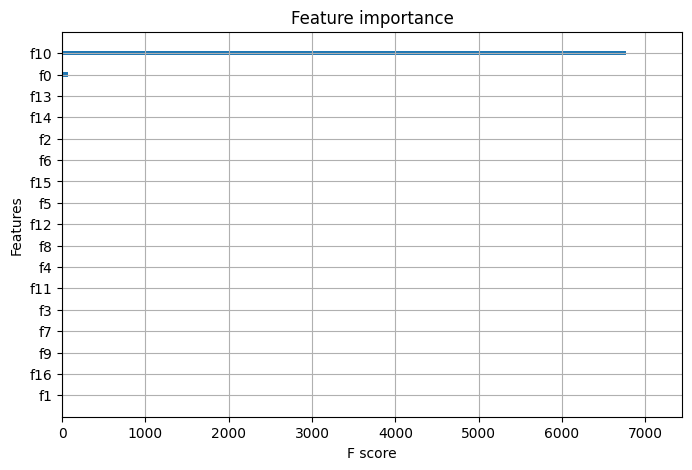

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

plot_importance(pipe['Classifier'], importance_type='gain', ax=ax, show_values=False)

plt.show()

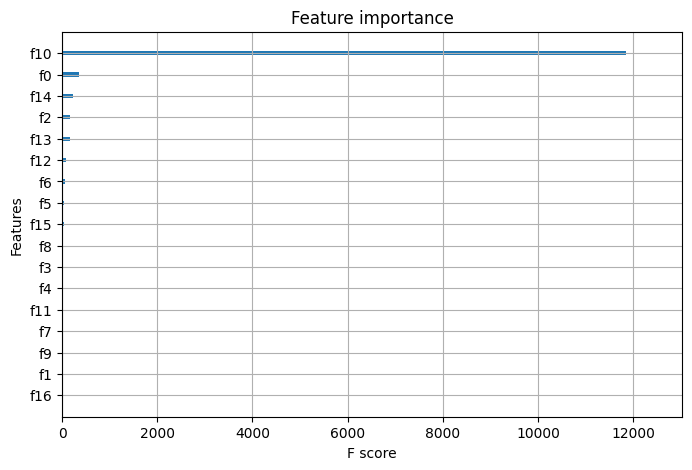

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

plot_importance(pipe['Classifier'], importance_type='cover', ax=ax, show_values=False)

plt.show()

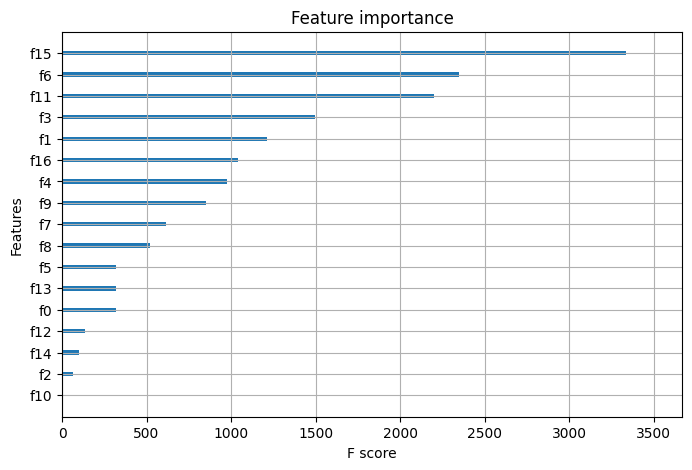

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

plot_importance(pipe['Classifier'], importance_type='weight', ax=ax, show_values=False)

plt.show()

- Para los métodos cover y gain se obtienen resultados similares, con las features 2 y 16 como las más relevantes,  mientras que el resto tiene poca o nula importancia, mas aún, su top 5 coincide.o que constrasta con el método weight, donde estas están entre las features de menor F score.
- No es de gran extrañeza que los resultados sean diferentes, ya que La importancia de las características según 'gain' se refiere a la ganancia promedio de cada característica al dividir los árboles de decisión durante el entrenamiento. 'Cover' se refiere a la cobertura promedio de cada característica, es decir, la frecuencia con la que una característica aparece en los árboles de decisión. 'Weight' se refiere al número total de veces que se utiliza una característica para dividir los árboles. De esta forma, la diferencia en los resultados entre 'cover'/'gain' y 'weight' puede deberse a la diferente perspectiva que cada método adopta al evaluar la importancia de las características. Mientras que 'cover' y 'gain' se centran en la frecuencia y contribución de las características en la construcción de los árboles, 'weight' se basa únicamente en el número de veces que una característica se utiliza para dividir los árboles.
- Las importancias obtenidas mediante el método de XGBoost proporcionan cierta interpretabilidad al modelo que utiliza árboles de decisión, ya que pueden ser útiles para comprender qué características son consideradas más importantes por el modelo en el proceso de clasificación. Sin embargo, no proporcionan una explicación completa de cómo se llega a una determinada predicción para una instancia en particular.

La debilidad principal de este método de importancia de características es que no revela las relaciones y decisiones específicas que se toman en cada árbol individual del modelo. Los árboles de decisión son inherentemente interpretables, pero cuando se combinan en un modelo más complejo como XGBoost, la interpretabilidad se ve comprometida. No podemos entender directamente cómo una característica específica en una instancia particular influye en la predicción final del modelo.


## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
pr = permutation_importance(pipe, X_test, y_test, n_repeats=30, random_state=0)

In [ ]:
pr['importances_mean']

array([0.03153871, 0.00355923, 0.01720034, 0.00121308, 0.03980168,
       0.00022576, 0.0056982 , 0.0026362 , 0.00171175, 0.0011545 ,
       0.00200609, 0.06600654, 0.00284767, 0.00606255, 0.00449941,
       0.00050295, 0.02511752, 0.        ])

In [ ]:
idx = pr.importances_mean.argsort()

In [ ]:
df.columns[idx]

Index(['Diabetes', 'Smoker', 'Stroke', 'Veggies', 'CholCheck', 'Fruits',
       'HvyAlcoholConsump', 'PhysActivity', 'MentHlth', 'Sex', 'DiffWalk',
       'HeartDiseaseorAttack', 'PhysHlth', 'HighChol', 'HighBP', 'Age', 'BMI',
       'GenHlth'],
      dtype='object')

Notar que en está en orden ascendente, y a pesar que diabetes aparece, esta columna dejó de considerarse en el column transformer, es por esto que aparece como una feature nula (NOTARLO EN LOS SIGUIENTES GRÁFICOS)

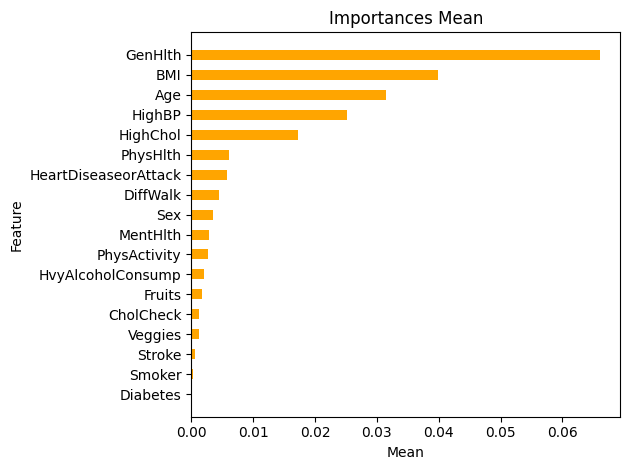

In [ ]:
fig, ax = plt.subplots()

idx = pr.importances_mean.argsort()
tl = df.columns[idx]

m = np.arange(len(pr['importances_mean']))
width = 0.5

ax.barh(m, pr['importances_mean'][idx], width, color='orange')

ax.set_title('Importances Mean')
ax.set_ylabel('Feature')
ax.set_xlabel('Mean')
ax.set_yticks(m)
ax.set_yticklabels(tl)

fig.tight_layout()

plt.show()

In [ ]:
pr['importances_std']

array([0.0022496 , 0.00103301, 0.00159279, 0.00031131, 0.00227726,
       0.00084376, 0.00080482, 0.00103664, 0.00099892, 0.00071906,
       0.00054067, 0.00245593, 0.00128007, 0.00163352, 0.00082337,
       0.00039904, 0.00165626, 0.        ])

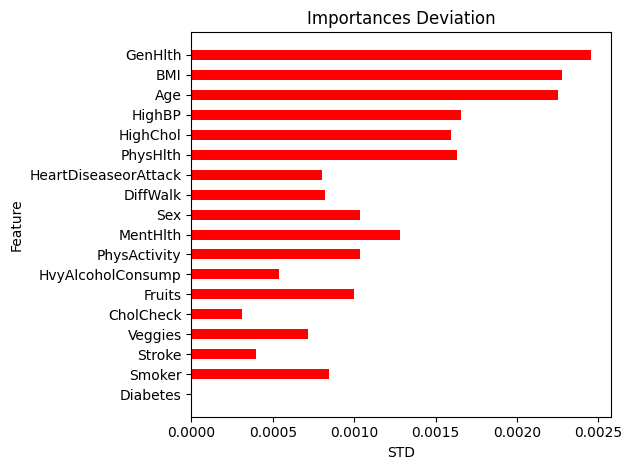

In [ ]:
fig, ax = plt.subplots()

ax.barh(m, pr['importances_std'][idx], width, color='red')

ax.set_title('Importances Deviation')
ax.set_ylabel('Feature')
ax.set_xlabel('STD')
ax.set_yticks(m)
ax.set_yticklabels(tl)

fig.tight_layout()

plt.show()

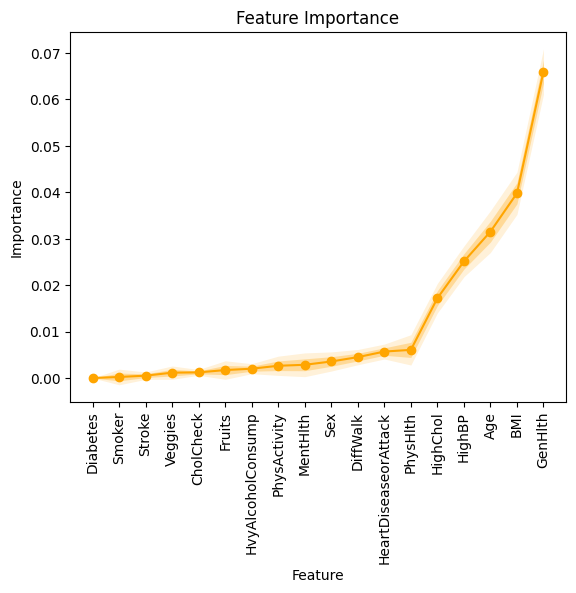

In [ ]:
fig, ax = plt.subplots()

rbm = np.array(pr['importances_mean'][idx])
rbd = np.array(pr['importances_std'][idx])

ax.plot(m, rbm, color='orange', marker='o')
ax.fill_between(m, rbm - rbd, rbm + rbd, alpha=0.3, color='orange', linewidth=0)
ax.fill_between(m, rbm - 2*rbd, rbm + 2*rbd, alpha=0.15, color='orange', linewidth=0)

ax.set_ylabel('Importance')
ax.set_xlabel('Feature')
ax.set_xticks(m)
ax.set_xticklabels(tl, rotation=90)
ax.set_title('Feature Importance')

plt.show()

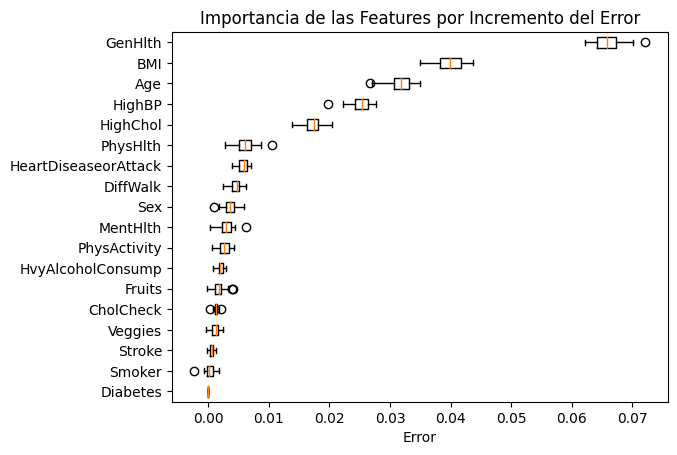

In [ ]:
fig, ax = plt.subplots()

ax.boxplot(
    pr.importances[idx].T,
    vert=False,
    labels=tl,
)
ax.set_title("Importancia de las Features por Incremento del Error")
ax.set_xlabel('Error')

plt.show()

- ¿Cómo mide la importancia de las features su propuesta?

El modelo mide la importancia de una feature como la diferencia o razón entre alguna medida de pérdida del modelo cuando está ha sido permutada en la matriz de características y la que se obtiene con los datos originales. En otras palabras, en este enfoque, se mide el impacto de permutar aleatoriamente los valores de una característica en alguna métrica como la precisión del modelo. Si la permutación de una característica causa una disminución significativa en la precisión, se considera una característica importante, ya que su valor original aporta información valiosa para el modelo.

- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?

Las 5 features con mayor importancia según el modelo son GenHlth (la salud genética tiene sentido que sea importante), BMI (el indice de amsa corporal también hace sentido como variable importante en el modelo ya que habla de la salud), Age (también hace sentido ya que las personas mayores tienen mas probavilidades de padecer diabetes), HighBP (Es logico pensar que la presión arterial afecta en gran medida que una persona sufra diabetes) y HighChol (definitivamente el colesterol alto es importante a la hora de que una persona tenga o no diabetes).

- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

En comparación con las importancias obtenidas anteriormente utilizando XGBoost, se observan algunas diferencias en el orden de importancia de las características. En el método de permutación, se da más énfasis a características como 'GenHlth' y 'BMI', que no se destacaron tanto en las importancias obtenidas con XGBoost. Esto puede deberse a que el método de permutación considera el impacto directo de cada característica al permutar sus valores, mientras que XGBoost utiliza algoritmos de árboles de decisión para calcular las importancias.

- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

**Ventajas:**

- El método es de fácil interpretación.
- No requiere volver a entrenar el modelo.
- Es posible comparar los resultados entre diferentes modelos.

**Desventajas:**

- Depende da la métrica de error del modelo.
- Si las features están correlacionadas puede generar sesgos debido a entradas poco realistas.
- Añadir una feature correlacionada puede decrecer la importancia de una feature asociada al separar la importancia en las dos features.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 27.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
import shap

clasiffier = XGBClassifier(n_estimators=5, max_depth=20, learning_rate=1e-3, objective='binary:logistic')

X_train = X_train.drop(columns = ["Diabetes"])

clasiffier.fit(X_train, y_train)

ct.set_output(transform = "pandas")


X = ct.fit_transform(df)

explainer = shap.TreeExplainer(clasiffier)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
X.columns.shape

(17,)

In [ ]:
X_train.columns.shape

(17,)

In [ ]:
shap_values

.values =
array([[-1.1540240e-03, -1.7464056e-04,  8.0660108e-04, ...,
        -8.1858430e-05, -8.2119568e-06, -2.7247500e-03],
       [-1.5908170e-03,  5.3677801e-04,  8.3239860e-04, ...,
        -4.8357306e-05, -6.7736319e-06,  2.7179373e-03],
       [-1.4097885e-03, -1.3793775e-04,  1.5442891e-04, ...,
        -2.4680622e-04, -1.3909800e-05,  2.0948928e-03],
       ...,
       [ 5.4191896e-05, -4.2396062e-04,  8.6475885e-04, ...,
        -7.0133923e-05, -1.1747033e-05,  2.5756925e-03],
       [-1.2720178e-03, -1.8978326e-04,  7.2874845e-04, ...,
        -5.4385964e-05, -7.7564318e-06, -3.1375578e-03],
       [ 1.3272284e-04, -4.0573033e-04,  8.9486421e-04, ...,
        -7.2390110e-05, -1.0586272e-05,  2.5804669e-03]], dtype=float32)

.base_values =
array([-7.149991e-05, -7.149991e-05, -7.149991e-05, ..., -7.149991e-05,
       -7.149991e-05, -7.149991e-05], dtype=float32)

.data =
array([[0.5       , 0.        , 1.        , ..., 0.        , 0.1627907 ,
        0.        ],
       [0.

In [ ]:
i = 1

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[i,:],
                X.iloc[i,:],
                link="logit")

En términos de interpretación de este gráfico, las características que tienen una contribución mayor a la derecha de la línea vertical (por encima de 0.5) están asociadas con una mayor probabilidad de pertenecer a la clase positiva, mientras que las características con una contribución mayor a la izquierda de la línea vertical (por debajo de 0.5) están asociadas con una mayor probabilidad de pertenecer a la clase negativa.

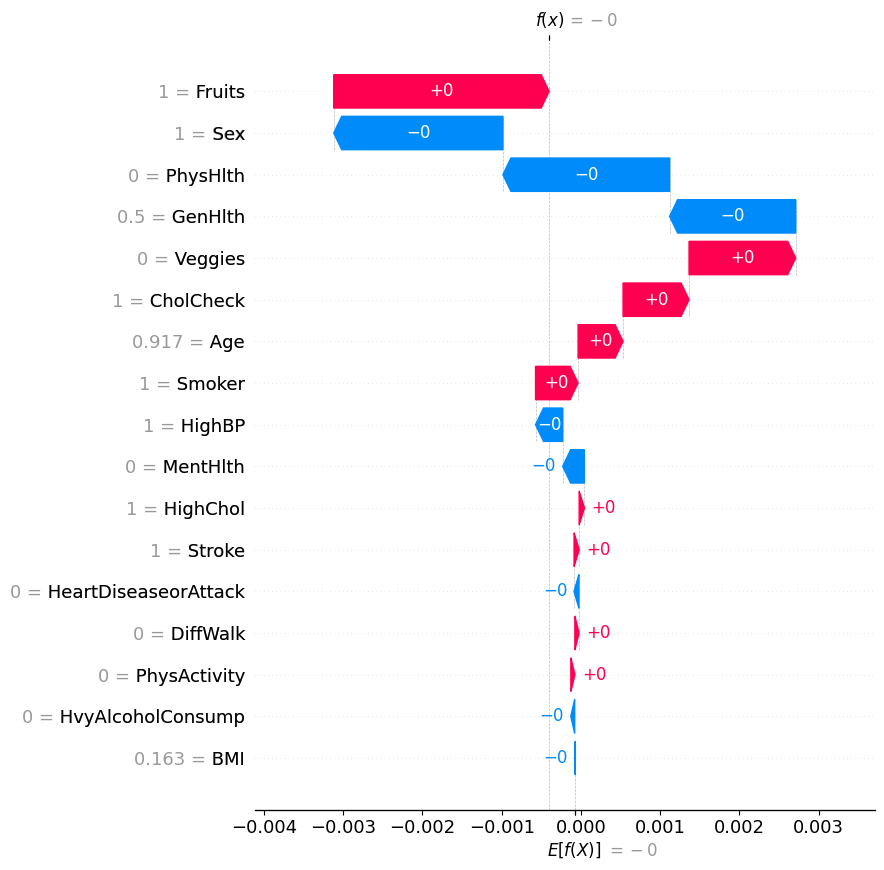

In [ ]:
shap.plots.waterfall(shap_values[i,:],
                     max_display=18)

Cada barra horizontal en el gráfico representa una característica y su contribución a la predicción. La posición horizontal de la barra indica la magnitud de la contribución, y la longitud de la barra muestra el impacto absoluto de esa característica en la predicción.

El gráfico comienza con una línea de referencia en el centro, que representa el valor esperado de la salida del modelo. A medida que se mueve hacia la derecha o hacia la izquierda, cada barra muestra la contribución aditiva de una característica. Las barras se suman progresivamente, lo que resulta en un cambio en la salida del modelo.

El color de la barra indica si su contribución aumenta o disminuye la salida del modelo. Las barras hacia la derecha indican contribuciones positivas, es decir, características que aumentan la probabilidad de la diabetes. Las barras hacia la izquierda indican contribuciones negativas, es decir, características que disminuyen la probabilidad de la diabetes.

En el resultado de los SHAP values, cada número representa la contribución de una característica específica en la predicción del modelo para un ejemplo de muestra dado. Estos valores muestran cómo cada característica afecta la salida del modelo en comparación con el valor esperado de la salida.

La positividad o negatividad de cada valor indica la dirección y el impacto de la característica en la predicción. Un valor positivo significa que la presencia o un valor alto de esa característica aumenta la probabilidad de tener diabetes (o disminuye la probabilidad de la clase negativa), mientras que un valor negativo indica lo contrario.

Por lo tanto, podemos atribuir un significado a la positividad/negatividad de cada valor en relación con la predicción de clase. Si el valor de una característica es positivo, significa que esa característica tiene el efecto de aumentar la probabilidad de diabetes. Por ejemplo, si la característica es el colesterol y tiene un valor positivo, implica que un nivel más alto de colesterol está asociado con una mayor probabilidad de tener diabetes.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [ ]:
# para i = 1 ya fue mostrado en la parte anterior
i = 9

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[i,:],
                X.iloc[i,:],
                link="logit")

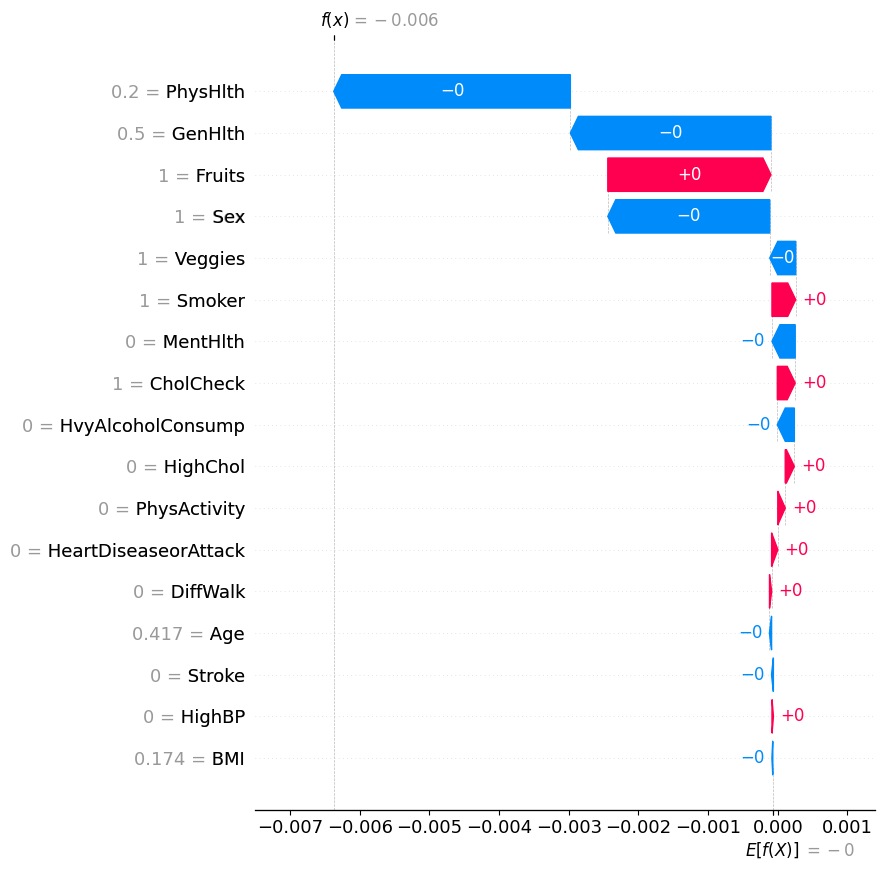

In [ ]:
shap.plots.waterfall(shap_values[i,:],
                     max_display=18)

In [ ]:
# para i = 1 ya fue mostrado en la parte anterior
i = 150

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[i,:],
                X.iloc[i,:],
                link="logit")

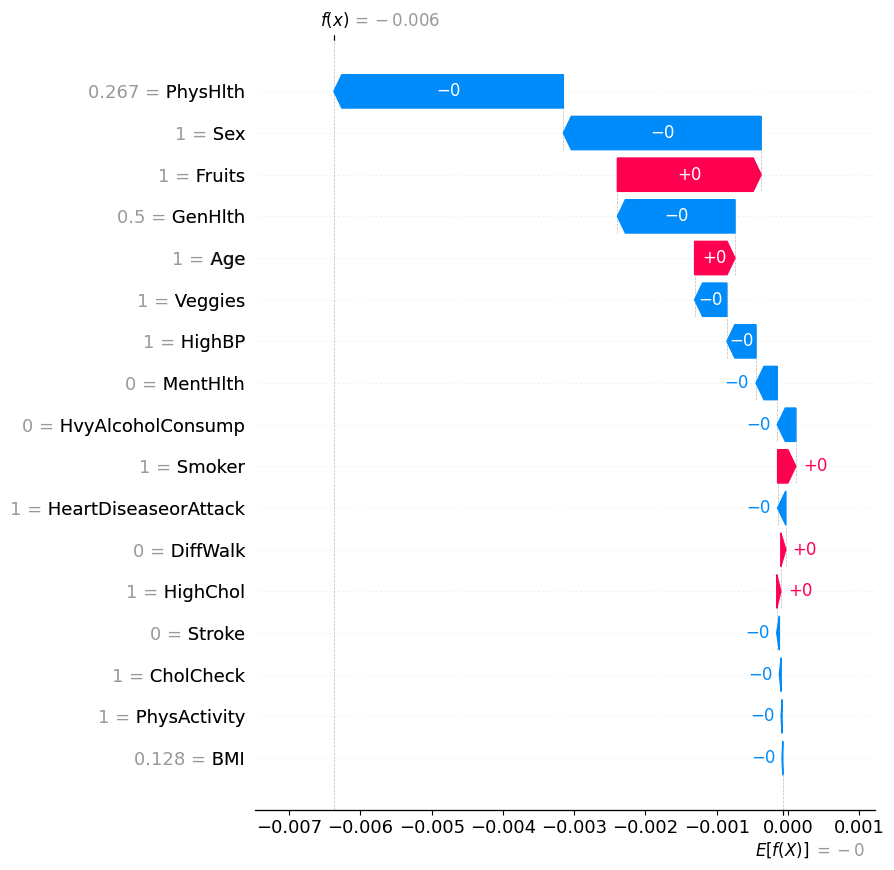

In [ ]:
shap.plots.waterfall(shap_values[i,:],
                     max_display=18)

- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (se entiende que afecta positivamente a poseer diabetes a que aumenta las posibilidades de poseerla)

Instancia 1
* Negativamente: PhysHlth, Sex = 1, GenHlth = 0.5, PhysHlth = 0, HighBP = 1, MentHlth = 0, HeartDiseaseorAttack = 0, HvyAlcoholConsump = 0,BMI = 0.163
* Positivamente: Age = 0.917, Fruits = 1, Veggies = 0, CholChek = 1, Smoker = 1, HighChol = 1, Stroke = 1, DiffWalk = 0, PhysActivity = 0

Instancia 9
* Negativamente: PhysHlth = 0.2, Sex = 1, GenHlth = 0.5, Age = 0.417, Veggies = 1, MentHlth = 0, HvyAlcoholConsump = 0, Age = 0.417, Stroke = 0, BMI = 0.174
* Positivamente: Smoker = 1, Fruits = 1, HighBP = 0, CholChek = 1, HighChol = 1, PhysActivity = 0, HeartDiseaseorAttack = 0, DiffWalk = 0, HighBP = 0

Instancia 150
* Negativamente: PhysHlth = 0.267, Sex = 1, GenHlth = 0.5, Veggies = 1, HighBP = 1, MentHlth = 0, HvyAlcoholConsump = 0, HeartDiseaseorAttack = 1, Stroke = 0, CholChek = 1, PhysActivity = 1, BMI = 0.128
* Positivamente: Fruits = 1, Age = 1, Smoker = 1, DiffWalk = 0, HighChol = 1



- ¿Existe algún patrón común entre las instancias analizadas?

Algunos patrones encontrados son los siguientes:

Importancia relativa: Pueden identificarse características que tienen una contribución más significativa en la predicción del modelo en diferentes instancias. Por ejemplo PhysHlth tiende a tener una barra más largas y consistentemente apunta hacia la izquierda, eso podría indicar que esa característica tiene una influencia dominante en las predicciones del modelo.

Cambio direccional: Pueden observarse que ciertas características siempre tienen barras que apuntan hacia la derecha, como por ejwmplo Fruits, y además hay variaciones en la dirección de las barras en diferentes instancias para ciertas variables, como Age. Esto puede revelar cómo las características influyen en la predicción de manera consistente o si hay casos en los que su influencia cambia.

Interacciones: Al comparar los patrones de las barras que apuntan hacia la derecha en diferentes instancias, se pueden identificar posibles interacciones entre características. Por ejemplo, Age tiene una contribución positiva en una instancia pero una contribución negativa en otra instancia, esto podría indicar una interacción con otra característica que varía entre esas instancias.

- ¿Es posible generalizar estas conclusiones a todo el dataset?
Dado el acotado analisis para instancias demasiado especificas, estas conclusiones no deben generalizarse al dataset completo, aunque si podrían brindar una idea de lo que podríamos esperar de las caracteristicas y como afectan las predicciones.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


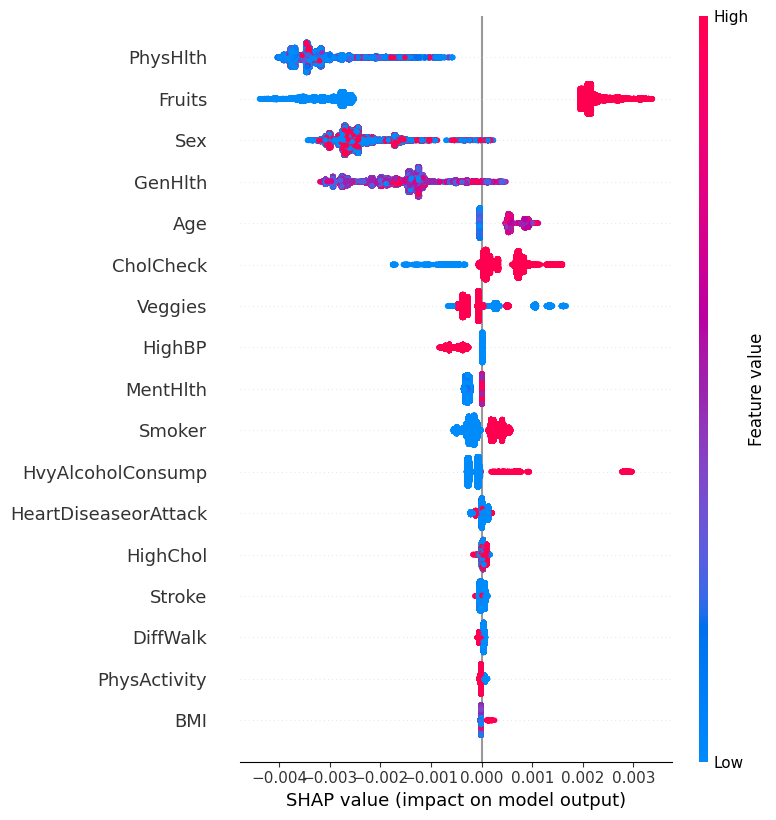

In [ ]:
shap.summary_plot(shap_values, X)

Cada punto representa un ejemplo de muestra individual en el conjunto de datos, y su posición horizontal indica el valor de importancia de la característica correspondiente para ese ejemplo en particular. Las barras horizontales representan la dispersión de los valores de importancia para cada característica en todo el conjunto de datos.

En el eje vertical del gráfico se encuentran las características del conjunto de datos. Cada característica tiene una barra horizontal asociada que indica la dispersión de los valores de importancia para esa característica. Cuanto más larga sea la barra, mayor será la variabilidad en los valores de importancia de esa característica.

El color de cada punto representa el valor de la característica para ese ejemplo de muestra. Los colores más claros indican valores más altos, mientras que los colores más oscuros indican valores más bajos.

Este gráfico permite visualizar la importancia de cada característica en el conjunto de datos y cómo varían los valores de importancia para cada ejemplo individual. se pueden identificar las características que tienen una mayor dispersión de importancia, lo que indica que su contribución a la predicción puede variar en función de las características específicas de cada ejemplo.

Gracias a estas visualizaciones, aunque con cierta variabilidad, podemos comprender de mejor manera como las caracteristicas tienden a afectar las predicciones, pudiendo obtener conclusiones generalizables a todo el dataset

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

In [ ]:
# Revisamos las features
feature_importance_names

Index(['GenHlth', 'HighBP', 'BMI', 'Age', 'HeartDiseaseorAttack', 'HighChol',
       'PhysActivity', 'HvyAlcoholConsump', 'CholCheck', 'Sex', 'DiffWalk',
       'Smoker', 'PhysHlth', 'MentHlth', 'Fruits', 'Veggies', 'Stroke'],
      dtype='object')

In [ ]:
feature_importance_names[:5]

Index(['GenHlth', 'HighBP', 'BMI', 'Age', 'HeartDiseaseorAttack'], dtype='object')

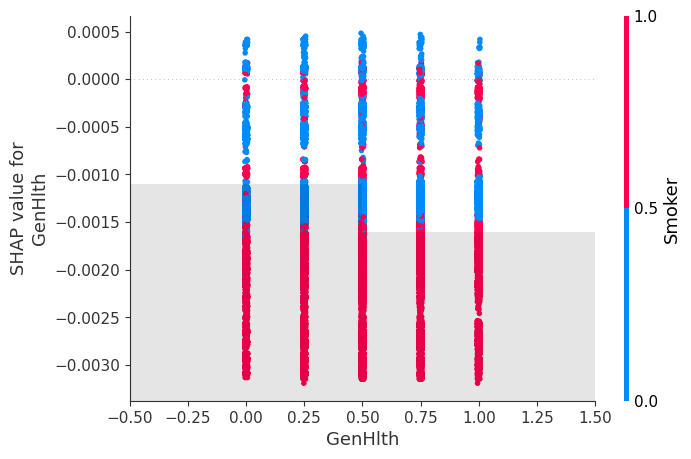

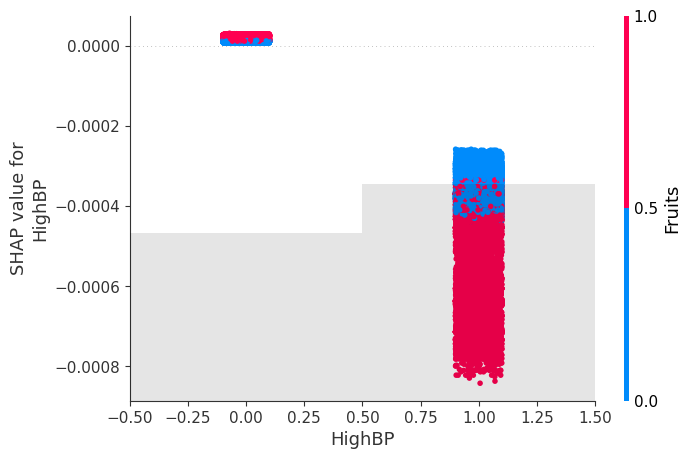

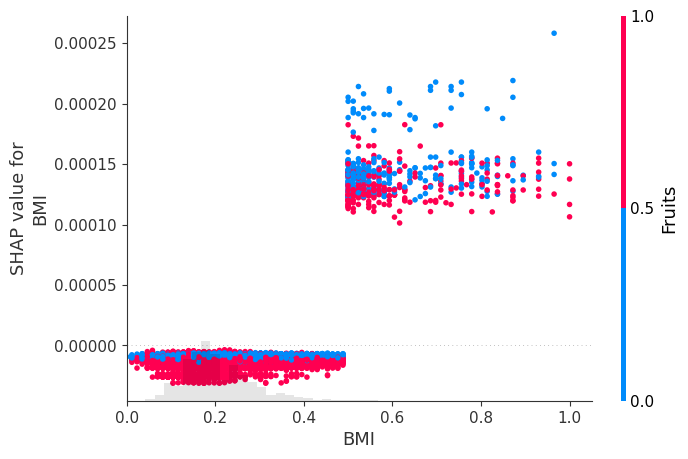

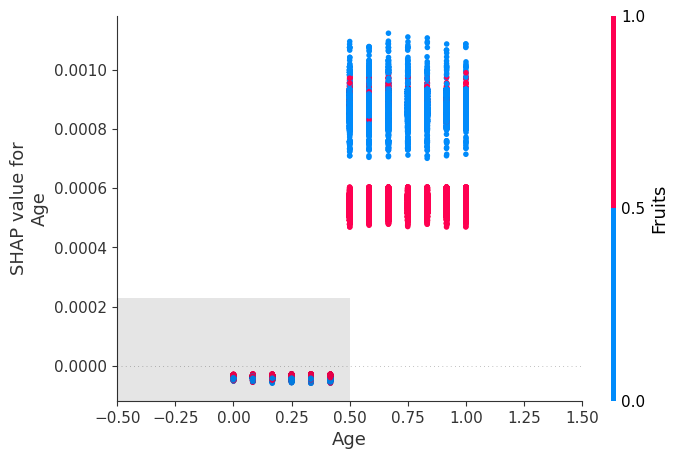

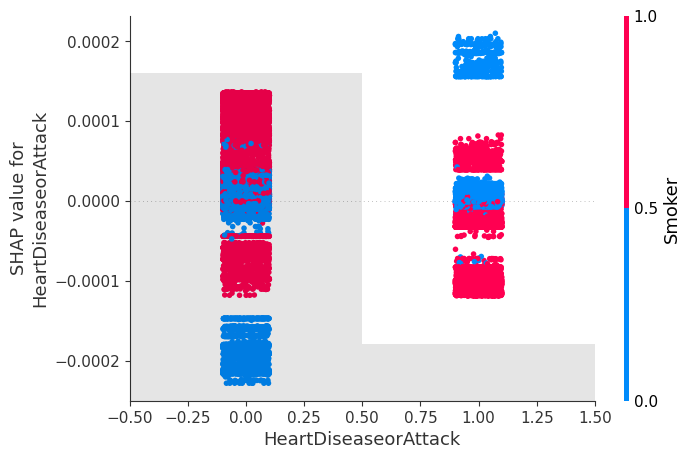

In [ ]:
for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name], color=shap_values, xmin=0)

Para interpretar estos gráficos deben tenerse en cuenta los siguientes puntos:

- Cada punto es una sola predicción (fila) del conjunto de datos.

- El eje x es el valor de la característica (de la matriz X, almacenada en shap_values.data).

- El eje y es el valor SHAP para esa función (almacenado en shap_values.values), que representa cuánto cambia el resultado del modelo para la predicción de esa muestra sabiendo que el valor de esa función cambia.

Con esto en mente, puede llegarse a las siguientes conclusiones:

Al analizar los resultados de los gráficos de dispersión para diferentes variables utilizando los valores SHAP, puedes llegar a varias conclusiones:

1. Importancia de la variable: Se observa que los valores SHAP de la variable BMI tiene una amplia dispersión y abarca un rango considerable, esto puede indicar que la variable tiene una influencia significativa en las predicciones del modelo. Por otro lado, GenHlth tiene una dispersión limitada, por lo tanto, es posible que esa variable tenga menos impacto en las predicciones.

2. Relación con la variable objetivo: Si los valores SHAP son predominantemente positivos para valores altos como HighBP, esto puede indicar una relación directa entre la variable y la variable objetivo. Esto puede ser útil para comprender cómo la variable en particular influye en las predicciones del modelo y su efecto.

3. Valores atípicos: Pueden verse valores atípicos o puntos que se desvían significativamente de la distribución general de los valores SHAP por ejemplo en Age. Estos puntos pueden indicar instancias inusuales o excepcionales que tienen un impacto desproporcionado en las predicciones del modelo. Identificar y comprender estos valores atípicos puede brindar información valiosa sobre casos especiales o situaciones particulares que pueden requerir una atención adicional.

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
X = df.drop(columns=["Diabetes"])
X1000 = shap.utils.sample(X, 1000)

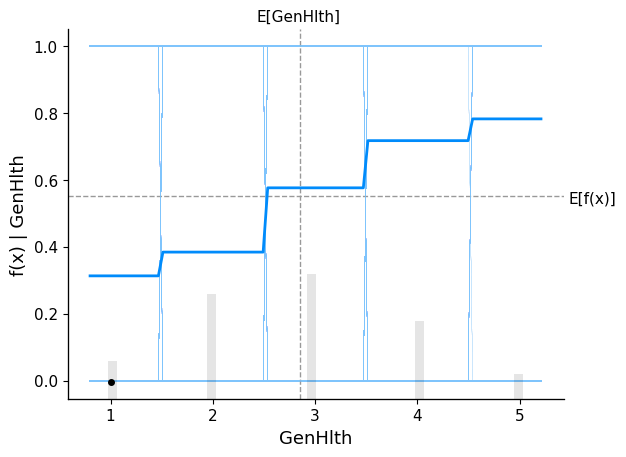

In [ ]:
sample_ind = 0
shap.partial_dependence_plot(
    'GenHlth', clasiffier.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

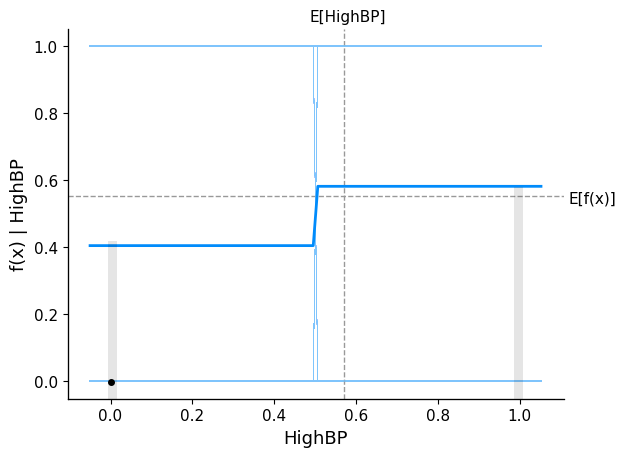

In [ ]:
sample_ind = 0
shap.partial_dependence_plot(
    'HighBP', clasiffier.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

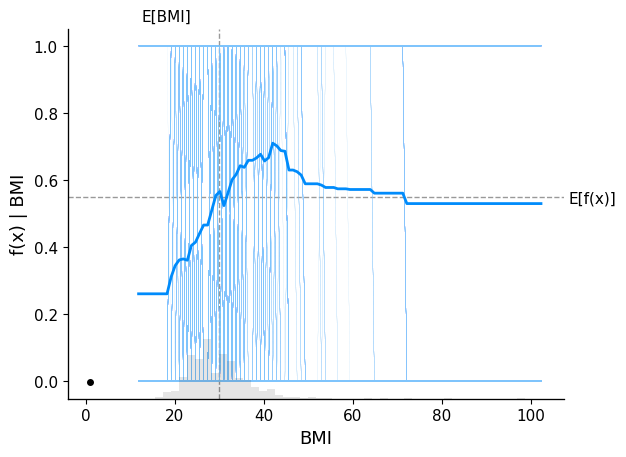

In [ ]:
sample_ind = 0
shap.partial_dependence_plot(
    'BMI', clasiffier.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

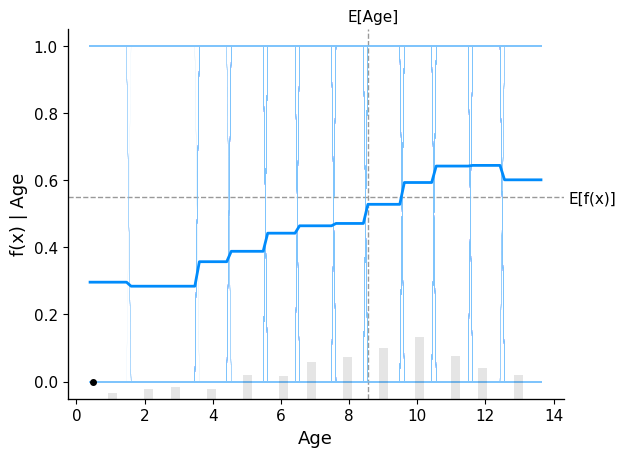

In [ ]:
sample_ind = 0
shap.partial_dependence_plot(
    'Age', clasiffier.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

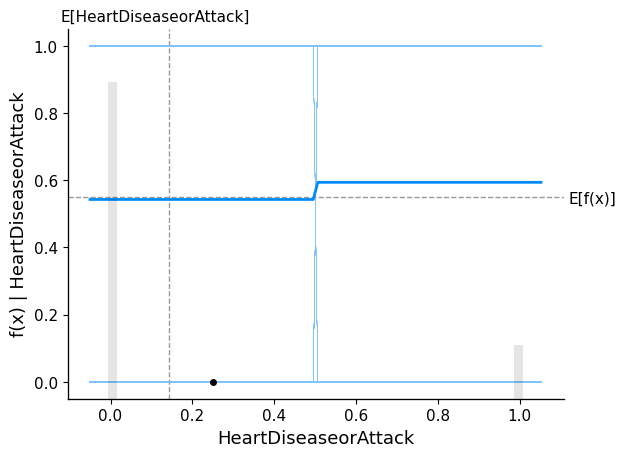

In [ ]:
sample_ind = 0
shap.partial_dependence_plot(
    'HeartDiseaseorAttack', clasiffier.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

¿Qué relación existe entre la salida promedio del modelo y cada feature analizada?

1. Relación lineal positiva: En Age se observa que la curvas tienen una tendencia ascendente, lo que indica una relación positiva entre la variable en el eje x y la predicción del modelo. Esto significa que a medida que el valor de la variable aumenta, la predicción también tiende a aumentar.

2. Efecto no lineal: Las curvas presentan comportamientos, lo que indica que la relación entre la variable y la predicción es más compleja. Puede haber efectos no lineales, puntos de inflexión o cambios en la dirección de la relación a medida que el valor de la variable cambia.

4. Variables con poco impacto: En HeartDiseaseorAttack y HighBP se encuentrasn gráficos con curvas planas o con cambios mínimos en la predicción a medida que varía la variable, esto sugiere que esa variable tiene poco impacto en las predicciones del modelo. Estas variables pueden tener una influencia limitada en la capacidad del modelo para hacer predicciones precisas.

5. Variables con alto impacto: En Age, BMI y GenHlth se observan cambios pronunciados en las curvas y en la predicción a medida que la variable cambia, esto indica que esas variables tiene un impacto significativo en las predicciones del modelo. Estas variables pueden ser consideradas como predictores clave y tener una influencia importante en la precisión del modelo.


¿Son estas conclusiones generalizables para todo el conjunto de datos?

Estas conclusiones pueden no ser generalizables para todo el conjunto de datos. La interpretación de los gráficos de valores SHAP y las conclusiones extraídas pueden variar según la naturaleza de los datos, la complejidad del modelo y la relación real entre las variables y las predicciones.



## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.7 MB/s eta 0:00:00


In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
X_test = X_test.drop(columns = ["Diabetes"])

In [ ]:
preds = clasiffier.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     11588
           1       0.72      0.71      0.72     11741

    accuracy                           0.72     23329
   macro avg       0.72      0.72      0.72     23329
weighted avg       0.72      0.72      0.72     23329



In [ ]:
predict_fn = lambda x: clasiffier.predict(x)
explainer = AnchorTabular(predict_fn, clasiffier.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': (25, 50, 75)},
  'version': '0.9.3'}
)

In [ ]:
explainer.predictor(X_test.to_numpy()[idx])[0]

0

In [ ]:
import numpy as np

# Obtener las clases únicas del conjunto de datos
classes = np.unique(y_train)

# Imprimir las clases disponibles
print("Clases disponibles:", classes)
class_names = classes

Clases disponibles: [0. 1.]


In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  0.0
Anchor: GenHlth <= 2.00 AND HighBP <= 0.00 AND Age <= 9.00 AND BMI <= 33.00
Precision: 0.97
Coverage: 0.17


In [ ]:
idx = 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  1.0
Anchor: GenHlth > 3.00 AND HighBP > 0.00 AND HighChol > 0.00 AND BMI > 25.00
Precision: 0.96
Coverage: 0.13


In [ ]:
idx = 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  0.0
Anchor: GenHlth <= 2.00 AND HighBP <= 0.00 AND BMI <= 25.00
Precision: 0.97
Coverage: 0.11


La precisión de las reglas propuestas se muestra en los resultados:

- Precision: 0.97
- Precision: 0.96
- Precision: 0.97


La precisión de las reglas indica la proporción de instancias que se clasificaron correctamente de acuerdo con las reglas en relación con todas las instancias que cumplen las condiciones de las reglas.

Sin embargo, es importante tener en cuenta que la cobertura de las reglas es baja para todas las instancias:

- Cobertura: 0.17
- Cobertura: 0.13
- Cobertura: 0.11


La cobertura indica la proporción de instancias en el conjunto de datos que cumplen las condiciones de las reglas propuestas. Una cobertura baja significa que estas reglas solo se aplican a un pequeño subconjunto de instancias.

Dado que la precisión de las reglas es alta, pero la cobertura es baja, esto sugiere que las reglas propuestas son muy específicas y se aplican solo a un número limitado de instancias en el conjunto de datos. Esto puede deberse a la naturaleza particular de las variables y las combinaciones de características utilizadas en las reglas.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Basado en los diferentes métodos discutidos hasta ahora, podemos evaluar su utilidad para la tarea de clasificación de diabetes y determinar qué métodos proporcionan conclusiones más sólidas:

1. Clasificador basado en árboles de decisión: Este método es útil para la clasificación de diabetes, ya que los árboles de decisión pueden capturar patrones complejos en los datos y proporcionar reglas claras para la toma de decisiones. Además, permiten interpretar las características más importantes y entender cómo contribuyen a la predicción.

2. Métodos de importancia de características: Estos métodos, permiten identificar qué características tienen un mayor impacto en la clasificación de diabetes. Esto es útil para comprender las características más relevantes y puede ayudar en la selección de características y la interpretación del modelo.

3. Análisis de importancia de características mediante SHAP: SHAP proporciona una explicación individual de las predicciones de un modelo. Permite evaluar la contribución de cada característica a la predicción de diabetes para instancias individuales. Esto ayuda a comprender cómo las características específicas influyen en la clasificación de cada instancia.

4. Métodos de reglas de clasificación: Estos métodos permiten obtener reglas claras y comprensibles para la clasificación de diabetes. Proporcionan una explicación basada en condiciones lógicas que pueden ser fácilmente interpretadas. Esto es especialmente útil cuando se requiere transparencia y justificación de las decisiones.

En cuanto al problema del doctor Simi, los métodos agnósticos locales son más útiles. Dado que el doctor Simi está interesado en comprender las razones específicas detrás de las predicciones para casos individuales, los métodos locales, como SHAP y las reglas de clasificación, brindan explicaciones específicas para cada instancia. Estos métodos son más adecuados para ofrecer interpretaciones detalladas y específicas sobre el diagnóstico de cada paciente, lo cual es esencial para el razonamiento médico y la toma de decisiones precisas.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>